In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load The Data

In [2]:
titanic_data = pd.read_csv('data/train.csv')

In [3]:
len(titanic_data)

891

In [4]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<Axes: xlabel='Survived', ylabel='count'>

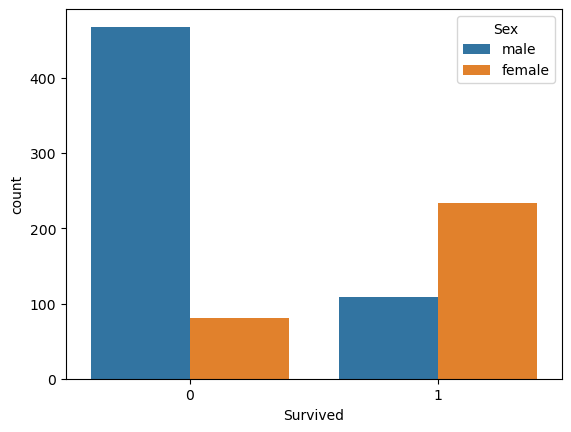

In [6]:
sns.countplot(x='Survived', data=titanic_data, hue='Sex')

In [7]:
#find the percentage of null values in age column

In [8]:
titanic_data['Age'].isna().sum()/len(titanic_data)*100

19.865319865319865

In [9]:
titanic_data['Cabin'].isna().sum()/len(titanic_data)*100

77.10437710437711

In [10]:
#find the distribution for the age column

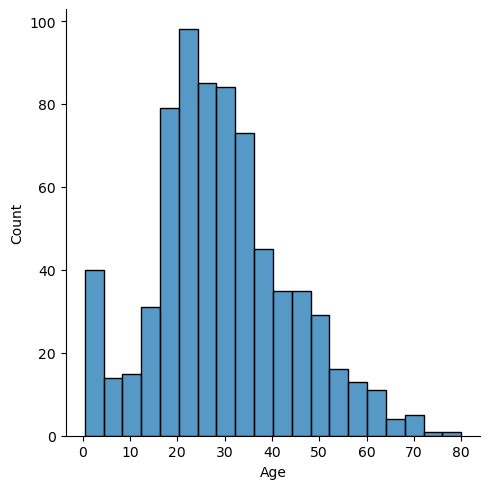

In [11]:
sns.displot(x='Age', data=titanic_data)

In [12]:
#fill null rows in age column 

In [13]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [14]:
titanic_data['Age'].isna().sum()

0

<Axes: >

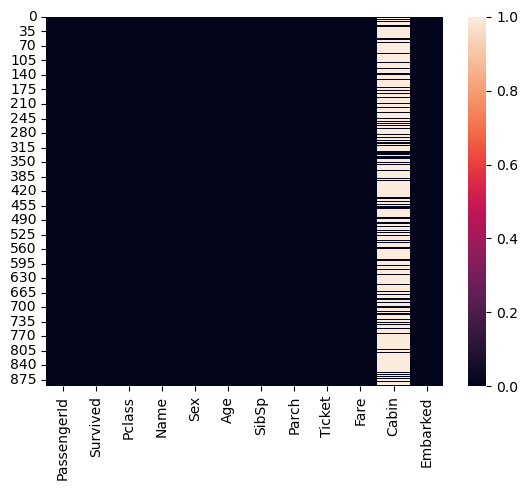

In [15]:
sns.heatmap(titanic_data.isna())

In [16]:
#Drop cabin column because there are a lot of null values

In [17]:
titanic_data.drop('Cabin', axis=1, inplace=True)

In [18]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [19]:
#convert sex column to numerical values

In [20]:
gender = pd.get_dummies(titanic_data['Sex'], drop_first=True)

In [21]:
titanic_data['Gender'] = gender

In [22]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [23]:
#drop the columns which are not required

In [24]:
titanic_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Gender         0
dtype: int64

In [25]:
titanic_data.drop(['Name', 'Sex', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [26]:
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1


In [27]:
#Seperate dependent and independent variables

In [28]:
x = titanic_data[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender']]
y = titanic_data['Survived']

In [29]:
import torch
import torch.nn as nn

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [30]:
n_samples, n_features = x.shape

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

In [32]:
x_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Gender
125,126,3,12.000000,1,0,11.2417,1
305,306,1,0.920000,1,2,151.5500,1
631,632,3,51.000000,0,0,7.0542,1
643,644,3,29.699118,0,0,56.4958,1
808,809,2,39.000000,0,0,13.0000,1
...,...,...,...,...,...,...,...
204,205,3,18.000000,0,0,8.0500,1
53,54,2,29.000000,1,0,26.0000,0
294,295,3,24.000000,0,0,7.8958,1
723,724,2,50.000000,0,0,13.0000,1


In [33]:
# scale
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [34]:
x_train = torch.from_numpy(np.array(x_train)).to(torch.float32)
y_train = torch.from_numpy(np.array(y_train)).to(torch.float32)

x_test = torch.from_numpy(np.array(x_test)).to(torch.float32)
y_test = torch.from_numpy(np.array(y_test)).to(torch.float32)

In [35]:
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)


In [36]:
# 1) Model
# Linear model f = wx + b, sigmoid at the end

class Model(nn.Module):
    def __init__(self, n_input_features):
        super(Model, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = Model(n_features)


In [37]:
# 2) Loss and optimizer
num_epochs = 2000
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [38]:
# 3) Training loop
for epoch in range(num_epochs):
    # Forward pass and loss
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train.float())

    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 100 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')


with torch.no_grad():
    y_predicted = model(x_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy: {acc.item():.4f}')

epoch: 100, loss = 0.6328
epoch: 200, loss = 0.5769
epoch: 300, loss = 0.5417
epoch: 400, loss = 0.5184
epoch: 500, loss = 0.5025
epoch: 600, loss = 0.4912
epoch: 700, loss = 0.4829
epoch: 800, loss = 0.4768
epoch: 900, loss = 0.4721
epoch: 1000, loss = 0.4684
epoch: 1100, loss = 0.4656
epoch: 1200, loss = 0.4633
epoch: 1300, loss = 0.4614
epoch: 1400, loss = 0.4599
epoch: 1500, loss = 0.4587
epoch: 1600, loss = 0.4576
epoch: 1700, loss = 0.4567
epoch: 1800, loss = 0.4560
epoch: 1900, loss = 0.4554
epoch: 2000, loss = 0.4548
accuracy: 0.8268


In [39]:
titanic_test_data = pd.read_csv('data/test.csv')

In [40]:
gender = pd.get_dummies(titanic_test_data['Sex'], drop_first=True)
titanic_test_data['Gender'] = gender
titanic_test_data['Age'].fillna(titanic_test_data['Age'].mean(), inplace=True)

In [42]:
titanic_test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [43]:
titanic_test_data.drop(['Name', 'Sex', 'Ticket', 'Embarked', 'Cabin'], axis=1, inplace=True)

In [44]:
test = sc.fit_transform(titanic_test_data)
test = torch.from_numpy(np.array(test)).to(torch.float32)

In [54]:
predictions = model(test).round().int()

# Convert the tensor to a NumPy array
numpy_predictions = predictions.detach().numpy()

# Create a pandas DataFrame from the NumPy array
prediction_df = pd.DataFrame(titanic_test_data['PassengerId'])
prediction_df['Survived'] = pd.DataFrame(numpy_predictions, columns=['Survived'])
prediction_df.to_csv("data/predictions.csv", index=False)

In [55]:
prediction_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
